# Mod 4 Project - Starter Notebook

This notebook has been provided to you so that you can make use of the following starter code to help with the trickier parts of preprocessing the Zillow dataset. 

The notebook contains a rough outline the general order you'll likely want to take in this project. You'll notice that most of the areas are left blank. This is so that it's more obvious exactly when you should make use of the starter code provided for preprocessing. 

**_NOTE:_** The number of empty cells are not meant to infer how much or how little code should be involved in any given step--we've just provided a few for your convenience. Add, delete, and change things around in this notebook as needed!

# Some Notes Before Starting

This project will be one of the more challenging projects you complete in this program. This is because working with Time Series data is a bit different than working with regular datasets. In order to make this a bit less frustrating and help you understand what you need to do (and when you need to do it), we'll quickly review the dataset formats that you'll encounter in this project. 

## Wide Format vs Long Format

If you take a look at the format of the data in `zillow_data.csv`, you'll notice that the actual Time Series values are stored as separate columns. Here's a sample: 

<img src='~/../images/df_head.png'>

You'll notice that the first seven columns look like any other dataset you're used to working with. However, column 8 refers to the median housing sales values for April 1996, column 9 for May 1996, and so on. This This is called **_Wide Format_**, and it makes the dataframe intuitive and easy to read. However, there are problems with this format when it comes to actually learning from the data, because the data only makes sense if you know the name of the column that the data can be found it. Since column names are metadata, our algorithms will miss out on what dates each value is for. This means that before we pass this data to our ARIMA model, we'll need to reshape our dataset to **_Long Format_**. Reshaped into long format, the dataframe above would now look like:

<img src='~/../images/melted1.png'>

There are now many more rows in this dataset--one for each unique time and zipcode combination in the data! Once our dataset is in this format, we'll be able to train an ARIMA model on it. The method used to convert from Wide to Long is `pd.melt()`, and it is common to refer to our dataset as 'melted' after the transition to denote that it is in long format. 

# Helper Functions Provided

Melting a dataset can be tricky if you've never done it before, so you'll see that we have provided a sample function, `melt_data()`, to help you with this step below. Also provided is:

* `get_datetimes()`, a function to deal with converting the column values for datetimes as a pandas series of datetime objects
* Some good parameters for matplotlib to help make your visualizations more readable. 

Good luck!


# Step 1: Load the Data/Filtering for Chosen Zipcodes

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import itertools
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')
from matplotlib.pylab import rcParams

%matplotlib inline
df = pd.read_csv('zillow_data.csv')

#
list(df['RegionName'])

[60657,
 75070,
 77494,
 60614,
 79936,
 77084,
 10467,
 60640,
 77449,
 94109,
 11226,
 32162,
 11375,
 11235,
 37013,
 90250,
 60647,
 37211,
 78660,
 60618,
 10011,
 10128,
 77573,
 77584,
 28269,
 79912,
 78572,
 94565,
 30349,
 20002,
 90046,
 78130,
 78613,
 20009,
 75052,
 10462,
 10456,
 37042,
 77429,
 63376,
 60613,
 77479,
 30044,
 73099,
 77036,
 77433,
 10463,
 11230,
 60629,
 11209,
 60625,
 30043,
 75034,
 11212,
 75287,
 28277,
 85032,
 7030,
 11214,
 21234,
 33160,
 78521,
 23464,
 77077,
 94501,
 30096,
 78704,
 98052,
 77379,
 75243,
 11221,
 78245,
 11229,
 8701,
 60619,
 90034,
 94110,
 78666,
 30024,
 60610,
 44107,
 75067,
 33025,
 33411,
 33139,
 11377,
 90044,
 48197,
 2169,
 23462,
 90805,
 66062,
 44035,
 95630,
 90650,
 11234,
 92683,
 85710,
 78745,
 11355,
 10314,
 30281,
 32210,
 37075,
 94558,
 60611,
 11215,
 90026,
 85225,
 91910,
 87111,
 28027,
 6010,
 78240,
 87114,
 89108,
 85308,
 11211,
 17603,
 93722,
 80134,
 48180,
 85281,
 78577,
 94533,
 156

In [ ]:
class ZipCode_TSA:
    def __init__(self, zip_code, start_date, dynamic=False):
        self.zip_code = zip_code
        self.start_date = start_date
        self.dynamic = dynamic
        
    def df_zipcode(self.zip_code)
        zipcode_df = df_long[df_long['ZipCode'] == self.zip_code]
        zipcode_df.set_index('time', inplace=True)
        zipcode_df = zipcode_df[start_date:]
        return zipcode_df
    
    def

In [8]:
def melt_data(df):
    melted = pd.melt(df, id_vars=['RegionName', 'City', 'State', 'CountyName'], var_name='time')
    melted['time'] = pd.to_datetime(melted['time'], infer_datetime_format=True)
    melted = melted.dropna(subset=['value'])
    return melted

df = pd.read_csv('zillow_data.csv')

df = df.drop(labels=['SizeRank','Metro', 'RegionID'], axis = 1)

df_long = melt_data(df)


df_long.rename(columns={'RegionName' : 'ZipCode'},inplace=True)

In [6]:
len(list(df['RegionName']))

14723

[60657, 75070, 77494, 60614, 79936, 77084, 10467, 60640, 77449, 94109]

In [46]:
df_long

,ZipCode,City,State,CountyName,time,value
0,60657,Chicago,IL,Cook,1996-04-01,334200.0
1,75070,McKinney,TX,Collin,1996-04-01,235700.0
2,77494,Katy,TX,Harris,1996-04-01,210400.0
3,60614,Chicago,IL,Cook,1996-04-01,498100.0
4,79936,El Paso,TX,El Paso,1996-04-01,77300.0
5,77084,Houston,TX,Harris,1996-04-01,95000.0
6,10467,New York,NY,Bronx,1996-04-01,152900.0
7,60640,Chicago,IL,Cook,1996-04-01,216500.0
8,77449,Katy,TX,Harris,1996-04-01,95400.0
9,94109,San Francisco,CA,San Francisco,1996-04-01,766000.0


Refactor into function to get all of them to compare.

In [9]:
rank_1_df = df_long[df_long['ZipCode'] == 60657]

In [10]:
rank_1_df.shape
rank_1_df.columns

Index(['ZipCode', 'City', 'State', 'CountyName', 'time', 'value'], dtype='object')

In [11]:
rank_1_df.set_index('time', inplace=True);

In [12]:
rk_1_2011 = rank_1_df['2011':]

In [13]:
rk_1_2011.head()

,ZipCode,City,State,CountyName,value
time,,,,,
2011-01-01,60657,Chicago,IL,Cook,729300.0
2011-02-01,60657,Chicago,IL,Cook,730200.0
2011-03-01,60657,Chicago,IL,Cook,730700.0
2011-04-01,60657,Chicago,IL,Cook,730000.0
2011-05-01,60657,Chicago,IL,Cook,730100.0


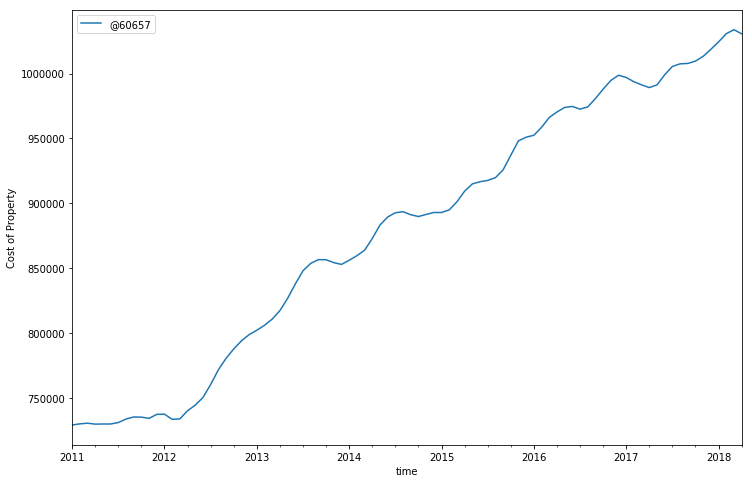

In [14]:
rk_1_2011.plot(y= 'value', figsize=(12,8), label= '@60657')
plt.legend()
plt.ylabel("Cost of Property")
plt.show();

In [15]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
pdqs = [(x[0], x[1], x[2], 1) for x in list(itertools.product(p, d, q))]

In [16]:
ans = []
for comb in pdq:
    for combs in pdqs:
        try:
            mod = sm.tsa.statespace.SARIMAX(rk_1_2011['value'],
                                            order=comb,
                                            seasonal_order=combs,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            output = mod.fit()
            ans.append([comb, combs, output.aic])
            print('ARIMA {} x {}12 : AIC Calculated ={}'.format(comb, combs, output.aic))
        except:
            continue

ARIMA (0, 0, 0) x (0, 0, 0, 1)12 : AIC Calculated =2631.896914927915
ARIMA (0, 0, 0) x (0, 0, 1, 1)12 : AIC Calculated =2542.3294288388424
ARIMA (0, 0, 0) x (0, 1, 0, 1)12 : AIC Calculated =1716.9914715391449
ARIMA (0, 0, 0) x (0, 1, 1, 1)12 : AIC Calculated =1618.3759538253653
ARIMA (0, 0, 0) x (1, 0, 0, 1)12 : AIC Calculated =1686.6647826733936
ARIMA (0, 0, 0) x (1, 0, 1, 1)12 : AIC Calculated =1594.9022228389251
ARIMA (0, 0, 0) x (1, 1, 0, 1)12 : AIC Calculated =1613.7799774291009
ARIMA (0, 0, 0) x (1, 1, 1, 1)12 : AIC Calculated =1598.3526079594174
ARIMA (0, 0, 1) x (0, 0, 0, 1)12 : AIC Calculated =2542.3294288388424
ARIMA (0, 0, 1) x (0, 0, 1, 1)12 : AIC Calculated =2502.7522896255055
ARIMA (0, 0, 1) x (0, 1, 0, 1)12 : AIC Calculated =1618.3759538253653
ARIMA (0, 0, 1) x (0, 1, 1, 1)12 : AIC Calculated =1584.2600643053736
ARIMA (0, 0, 1) x (1, 0, 0, 1)12 : AIC Calculated =2520.5003482184243
ARIMA (0, 0, 1) x (1, 0, 1, 1)12 : AIC Calculated =2493.251392618514
ARIMA (0, 0, 1) x (1, 

In [17]:
ans_df = pd.DataFrame(ans, columns=['pdq', 'pdqs', 'aic'])
ans_df.loc[ans_df['aic'].idxmin()]

pdq        (1, 1, 1)
pdqs    (1, 1, 1, 1)
aic          1544.63
Name: 63, dtype: object

In [18]:
ARIMA_MODEL = sm.tsa.statespace.SARIMAX(rk_1_2011['value'],
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 1),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

output = ARIMA_MODEL.fit()

print(output.summary().tables[1])


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2383      0.019    -12.642      0.000      -0.275      -0.201
ma.L1          0.5225      0.051     10.177      0.000       0.422       0.623
ar.S.L1       -0.2383      0.019    -12.642      0.000      -0.275      -0.201
ma.S.L1        0.5225      0.051     10.177      0.000       0.422       0.623
sigma2      6.816e+06   1.15e-09   5.92e+15      0.000    6.82e+06    6.82e+06


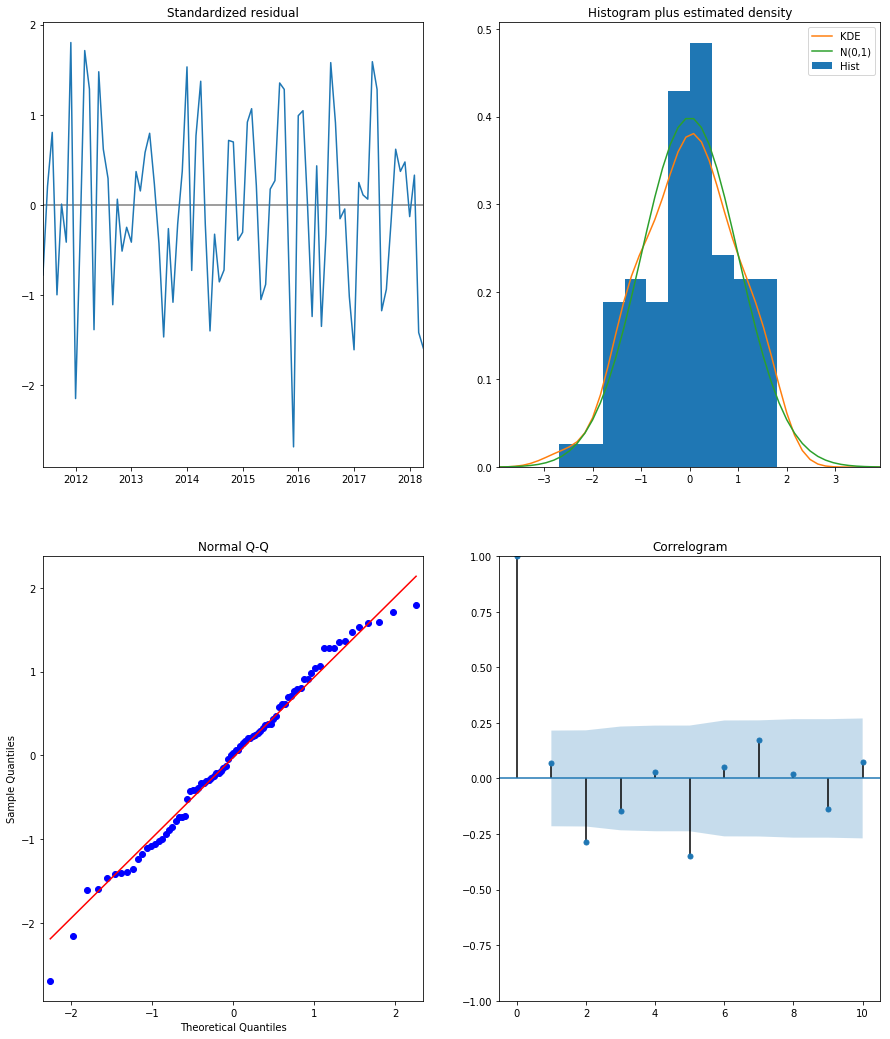

In [19]:
output.plot_diagnostics(figsize=(15, 18))
plt.show()

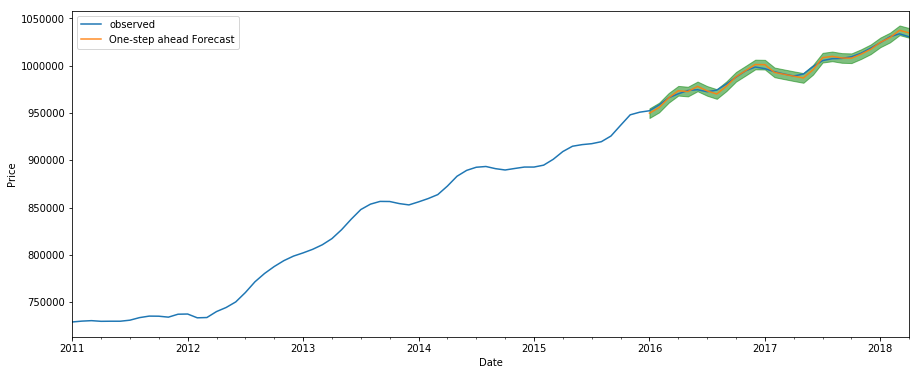

In [20]:
pred = output.get_prediction(start=pd.to_datetime('2016-01-01'), dynamic=False)
pred_conf = pred.conf_int()

rcParams['figure.figsize'] = 15, 6

#Plot observed values
ax = rk_1_2011['value']['2011':].plot(label='observed')

#Plot predicted values
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.9)

#Plot the range for confidence intervals
ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='g', alpha=.5)

#Set axes labels
ax.set_xlabel('Date')
ax.set_ylabel('Price')
plt.legend()

plt.show()

In [21]:
# Get forecast 6 steps ahead in future
prediction = output.get_forecast(steps=6)

# Get confidence intervals of forecasts
pred_conf = prediction.conf_int()

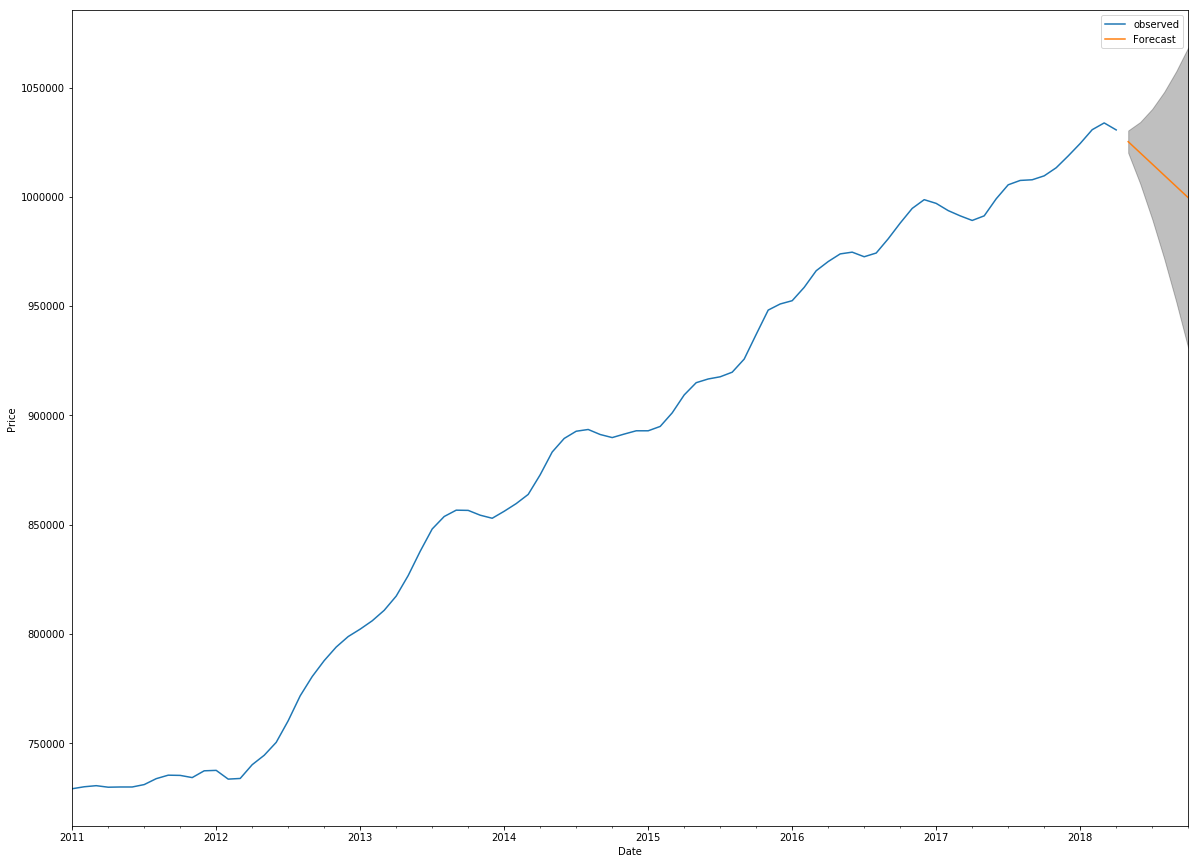

In [22]:
ax = rk_1_2011['value'].plot(label='observed', figsize=(20, 15))
prediction.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Price')

plt.legend()
plt.show()

In [ ]:
import math

In [30]:
# the range of possible gains or losses
abs(pred_conf.iloc[:, 0] - pred_conf.iloc[:, 1])

2018-05-01     10234.167609
2018-06-01     28207.168436
2018-07-01     50407.596616
2018-08-01     76244.801586
2018-09-01    105345.789740
2018-10-01    137366.728146
Freq: MS, dtype: float64

In [33]:
#What the forecast is at the end of 6 months
prediction.predicted_mean[-1] - prediction.predicted_mean[0]


-25600.46025235881

In [34]:
prediction.predicted_mean

2018-05-01    1.025229e+06
2018-06-01    1.020115e+06
2018-07-01    1.015001e+06
2018-08-01    1.009873e+06
2018-09-01    1.004752e+06
2018-10-01    9.996282e+05
Freq: MS, dtype: float64

In [39]:
# predicted max gains
max_gain = pred_conf.iloc[:, 1] - rk_1_2011['value'][-1]

In [40]:
# Predicted max losses
max_loss = pred_conf.iloc[:, 0] - rk_1_2011['value'][-1]

In [45]:
(max_loss)/rk_1_2011['value'][-1]

2018-05-01   -0.010177
2018-06-01   -0.023859
2018-07-01   -0.039591
2018-08-01   -0.057102
2018-09-01   -0.076190
2018-10-01   -0.096696
Freq: MS, Name: lower value, dtype: float64

# Step 2: Data Preprocessing

In [41]:
def get_datetimes(df):
    return pd.to_datetime(df.columns.values[1:], format='%Y-%m')

Checking to see if we have any missing values

In [ ]:
df_long = df_long.drop('Metro', axis = 1)

In [ ]:
df_long.isnull().sum()

# Step 3: EDA and Visualization

In [ ]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

matplotlib.rc('font', **font)

# NOTE: if you visualizations are too cluttered to read, try calling 'plt.gcf().autofmt_xdate()'!

# Step 4: Reshape from Wide to Long Format

# Step 5: ARIMA Modeling

# Step 6: Interpreting Results